# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [143]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


# 設定 data_path
dir_data = 'D:/GitHub/Data/Data1'

f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
##app_train.head()


Path of read in data: D:/GitHub/Data/Data1\application_train.csv


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [144]:
app_train['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [145]:
#1
"""
Your code here
"""
cut_rule = pd.IntervalIndex.from_tuples([(-0.9,0.9),(0, 2), (2, 5), (5, 20)])
 

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

 

(-0.9, 0.9]    215371
(0.0, 2.0]      87868
(2.0, 5.0]       4230
(5.0, 20.0]        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [146]:
## 0 個小孩
## 有 1 - 2 個小孩
## 有 3 - 5 個小孩
## 有超過 5 個小孩

count = 0
for i in app_train['CNT_CHILDREN'].values:
    if i > 5 :
        count +=1
print(count)

42


In [147]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,"(-0.9, 0.9]"
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(-0.9, 0.9]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(-0.9, 0.9]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.9, 0.9]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(-0.9, 0.9]"


In [148]:
#2-1
"""
Your code here
"""
grp = "CNT_CHILDREN_GROUP"

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()



CNT_CHILDREN_GROUP
(-0.9, 0.9]    166288.713566
(0.0, 2.0]     174725.712648
(2.0, 5.0]     173626.303191
(5.0, 20.0]    147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

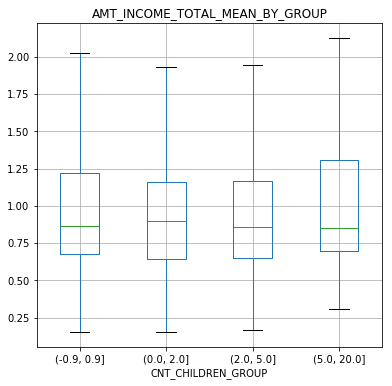

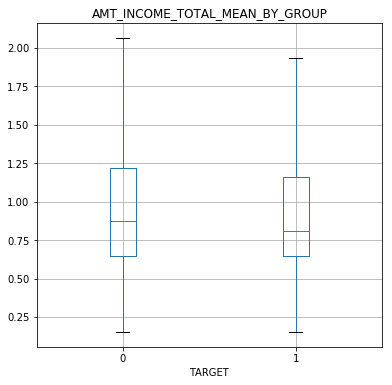

In [171]:
#2-2
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_MEAN_BY_GROUP'] = grouped_df.apply(lambda  x: x / x.mean() )

plt_column = "AMT_INCOME_TOTAL_MEAN_BY_GROUP"
plt_by = "CNT_CHILDREN_GROUP"



app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(6,6))
plt.suptitle('')
plt.show()

plt_column = "AMT_INCOME_TOTAL_MEAN_BY_GROUP"
plt_by = "TARGET"

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(6,6))
plt.suptitle('')
plt.show()



In [173]:
#3
 

app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda  x: x / x.mean() )

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()



,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,1.217762
1,270000.0,1.623682
2,67500.0,0.405921
3,135000.0,0.811841
4,121500.0,0.730657
